<a href="https://colab.research.google.com/github/Malope-cmd/Malope-cmd/blob/main/Machine_Learning_vs_SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate correlated data
n_samples = 100
correlation = 0.95

# Generate independent variables
x = np.random.rand(n_samples)

# Generate y with the desired correlation
y = correlation * x + np.sqrt(1 - correlation**2) * np.random.rand(n_samples)

# Create a pandas DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Display the first few rows of the DataFrame
display(df.head())

,x,y
0,0.374540,0.365627
1,0.950714,1.101898
2,0.731994,0.793552
3,0.598658,0.727527
4,0.156019,0.431605


In [2]:
import statsmodels.api as sm

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(df['x'])

# Build the OLS model
model = sm.OLS(df['y'], X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     915.0
Date:                Thu, 04 Sep 2025   Prob (F-statistic):           1.67e-51
Time:                        13:24:53   Log-Likelihood:                 97.782
No. Observations:                 100   AIC:                            -191.6
Df Residuals:                      98   BIC:                            -186.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1604      0.017      9.293      0.0

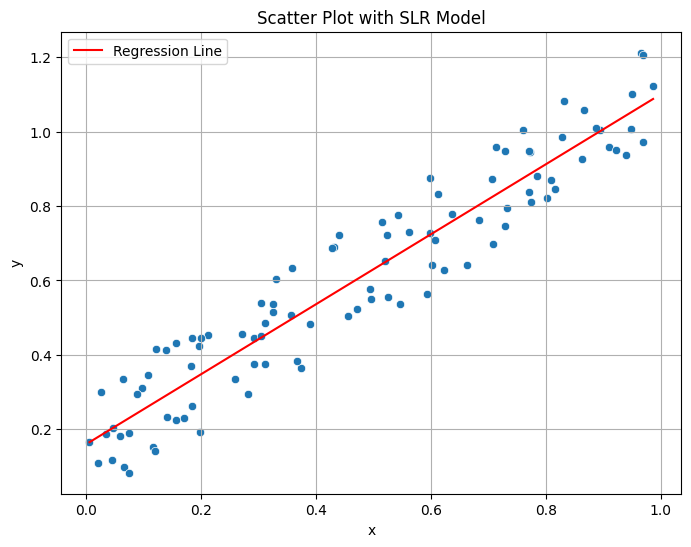

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=df)

# Plot the regression line
# Get the intercept and slope from the model summary
intercept = model.params['const']
slope = model.params['x']

# Generate x values for the regression line
x_line = np.linspace(df['x'].min(), df['x'].max(), 100)

# Calculate the corresponding y values using the regression equation
y_line = intercept + slope * x_line

# Plot the regression line
plt.plot(x_line, y_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with SLR Model')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import seaborn as sns

In [23]:
# Compile the model with SGD optimizer and doubled learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=0.7) # Default learning rate for SGD is 0.01, so 2x is 0.02
model_nn.compile(optimizer=optimizer, loss='mse')

tf.random.set_seed(13)
# You would then train the model again with the new optimizer and learning rate
model_nn.fit(df[['x', 'y']], df['y'], epochs=50, verbose=0)

print("Neural network model compiled with SGD and doubled learning rate.")

Neural network model compiled with SGD and doubled learning rate.


In [24]:
# Generate predictions from the neural network model using the original dataframe
y_pred_nn = model_nn.predict(df[['x', 'y']])

# Create a new dataframe with original x values and the predictions
df_pred = pd.DataFrame({'x': df['x'], 'y_pred_nn': y_pred_nn.flatten()})

# Sort the dataframe by x values for plotting the line
df_pred_sorted = df_pred.sort_values(by='x')

# Now use df_pred_sorted['x'] and df_pred_sorted['y_pred_nn'] for plotting
x_line_nn = df_pred_sorted['x']
y_line_nn = df_pred_sorted['y_pred_nn']

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


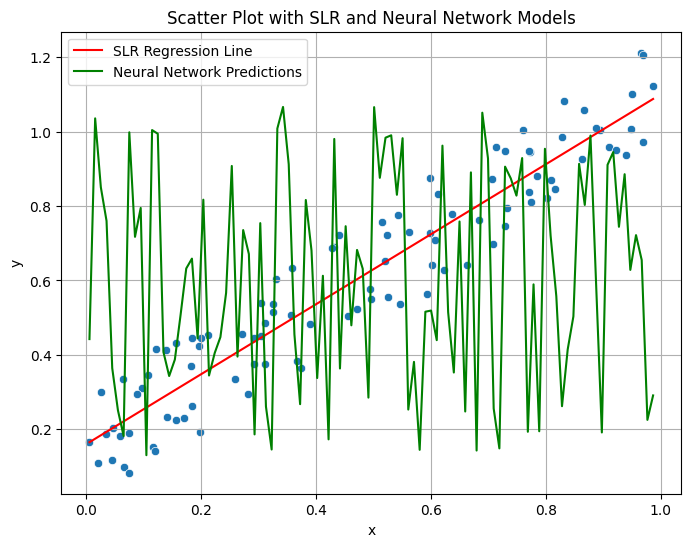

In [20]:
# Create a scatter plot of the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=df)

# Plot the regression line (SLR)
# Get the intercept and slope from the model summary
intercept = model.params['const']
slope = model.params['x']


# Calculate the corresponding y values using the regression equation
y_line_slr = intercept + slope * x_line

# Plot the SLR regression line
plt.plot(x_line, y_line_slr, color='red', label='SLR Regression Line')

# Plot the neural network predictions
plt.plot(x_line, y_pred_nn, color='green', label='Neural Network Predictions')


# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with SLR and Neural Network Models')
plt.legend()
plt.grid(True)
plt.show()